# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

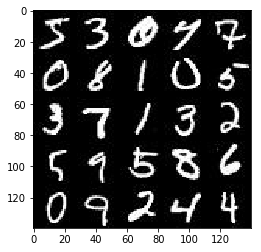

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

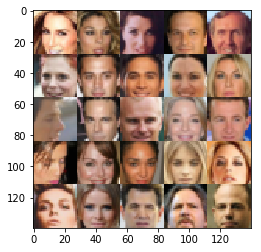

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/daot1/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name="input_images")
    input_zs = tf.placeholder(tf.float32, (None, z_dim), name='input_zs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    #return inputs_real, inputs_z
    return input_images, input_zs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    
    alpha=0.1
    with tf.variable_scope('discriminator', reuse=reuse):
        # 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    
    alpha=0.1
    with tf.variable_scope('generator', reuse=not is_train):
        # fully connected layer
        x1 = tf.layers.dense(z, 7*7*256)
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x256
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 14x14x128
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 28x28x64
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 28x28x3
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_images, input_zs, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_images, input_zs, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    idx = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                idx += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_images: batch_images, input_zs: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_images: batch_images, input_zs: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_images: batch_images, input_zs: batch_z, lr: learning_rate})
                
                if idx % 100 == 0:
                    show_generator_output(sess, 16, input_zs, data_shape[3], data_image_mode)
                
                if idx % 10 == 0:                    
                    train_loss_d = d_loss.eval({input_zs: batch_z, input_images: batch_images})
                    train_loss_g = g_loss.eval({input_zs: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.8449... Generator Loss: 0.3087
Epoch 1/2... Discriminator Loss: 2.0325... Generator Loss: 0.4496
Epoch 1/2... Discriminator Loss: 2.9765... Generator Loss: 0.0826
Epoch 1/2... Discriminator Loss: 1.8881... Generator Loss: 0.3727
Epoch 1/2... Discriminator Loss: 1.7363... Generator Loss: 0.5925
Epoch 1/2... Discriminator Loss: 2.2010... Generator Loss: 0.2114
Epoch 1/2... Discriminator Loss: 1.9826... Generator Loss: 0.3537
Epoch 1/2... Discriminator Loss: 1.6974... Generator Loss: 0.4022
Epoch 1/2... Discriminator Loss: 1.8000... Generator Loss: 0.3981


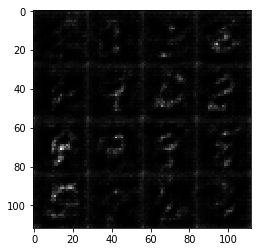

Epoch 1/2... Discriminator Loss: 1.8070... Generator Loss: 0.3532
Epoch 1/2... Discriminator Loss: 1.6988... Generator Loss: 0.4653
Epoch 1/2... Discriminator Loss: 1.4615... Generator Loss: 0.6628
Epoch 1/2... Discriminator Loss: 1.5260... Generator Loss: 0.6716
Epoch 1/2... Discriminator Loss: 1.5633... Generator Loss: 0.5534
Epoch 1/2... Discriminator Loss: 1.6039... Generator Loss: 0.5679
Epoch 1/2... Discriminator Loss: 1.5889... Generator Loss: 0.4722
Epoch 1/2... Discriminator Loss: 1.9656... Generator Loss: 0.2647
Epoch 1/2... Discriminator Loss: 1.5369... Generator Loss: 0.5905
Epoch 1/2... Discriminator Loss: 1.2997... Generator Loss: 0.6388


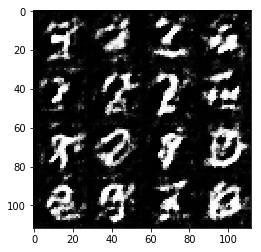

Epoch 1/2... Discriminator Loss: 1.9723... Generator Loss: 0.2544
Epoch 1/2... Discriminator Loss: 2.0344... Generator Loss: 0.2518
Epoch 1/2... Discriminator Loss: 1.2915... Generator Loss: 0.7134
Epoch 1/2... Discriminator Loss: 1.3517... Generator Loss: 0.6191
Epoch 1/2... Discriminator Loss: 1.5482... Generator Loss: 0.4988
Epoch 1/2... Discriminator Loss: 1.5761... Generator Loss: 0.5283
Epoch 1/2... Discriminator Loss: 1.5196... Generator Loss: 0.4766
Epoch 1/2... Discriminator Loss: 1.8299... Generator Loss: 0.3759
Epoch 1/2... Discriminator Loss: 1.5463... Generator Loss: 0.5162
Epoch 1/2... Discriminator Loss: 1.7368... Generator Loss: 0.3689


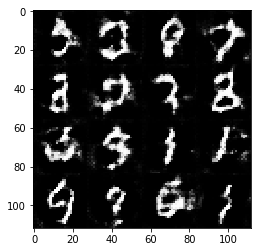

Epoch 1/2... Discriminator Loss: 1.9902... Generator Loss: 0.3553
Epoch 1/2... Discriminator Loss: 1.5973... Generator Loss: 0.4096
Epoch 1/2... Discriminator Loss: 1.7688... Generator Loss: 0.4130
Epoch 1/2... Discriminator Loss: 1.7135... Generator Loss: 0.4262
Epoch 1/2... Discriminator Loss: 1.5693... Generator Loss: 0.4664
Epoch 1/2... Discriminator Loss: 1.6084... Generator Loss: 0.4678
Epoch 1/2... Discriminator Loss: 1.7852... Generator Loss: 0.3604
Epoch 1/2... Discriminator Loss: 1.8734... Generator Loss: 0.3116
Epoch 1/2... Discriminator Loss: 1.5512... Generator Loss: 0.6611
Epoch 1/2... Discriminator Loss: 1.4590... Generator Loss: 0.4888


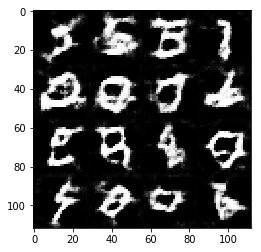

Epoch 1/2... Discriminator Loss: 1.8319... Generator Loss: 0.3071
Epoch 1/2... Discriminator Loss: 1.9209... Generator Loss: 0.2867
Epoch 1/2... Discriminator Loss: 1.7740... Generator Loss: 0.3442
Epoch 1/2... Discriminator Loss: 1.4824... Generator Loss: 0.5244
Epoch 1/2... Discriminator Loss: 1.6991... Generator Loss: 0.3791
Epoch 1/2... Discriminator Loss: 1.4828... Generator Loss: 0.5717
Epoch 1/2... Discriminator Loss: 1.5686... Generator Loss: 0.6308
Epoch 1/2... Discriminator Loss: 1.6033... Generator Loss: 0.4369
Epoch 1/2... Discriminator Loss: 1.6196... Generator Loss: 0.7650
Epoch 1/2... Discriminator Loss: 1.5390... Generator Loss: 0.6562


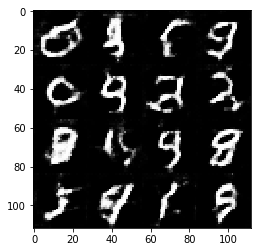

Epoch 1/2... Discriminator Loss: 1.5779... Generator Loss: 0.4256
Epoch 1/2... Discriminator Loss: 1.5539... Generator Loss: 0.6998
Epoch 1/2... Discriminator Loss: 1.4456... Generator Loss: 0.5993
Epoch 1/2... Discriminator Loss: 1.3723... Generator Loss: 0.6388
Epoch 1/2... Discriminator Loss: 1.4227... Generator Loss: 0.5507
Epoch 1/2... Discriminator Loss: 1.5513... Generator Loss: 0.9053
Epoch 1/2... Discriminator Loss: 1.4896... Generator Loss: 0.5567
Epoch 1/2... Discriminator Loss: 1.4841... Generator Loss: 0.9093
Epoch 1/2... Discriminator Loss: 1.5548... Generator Loss: 0.5303
Epoch 1/2... Discriminator Loss: 1.4559... Generator Loss: 0.8358


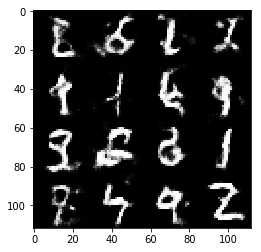

Epoch 1/2... Discriminator Loss: 1.4863... Generator Loss: 0.5505
Epoch 1/2... Discriminator Loss: 1.4124... Generator Loss: 0.5805
Epoch 1/2... Discriminator Loss: 1.3457... Generator Loss: 0.8403
Epoch 1/2... Discriminator Loss: 1.5395... Generator Loss: 0.4457
Epoch 1/2... Discriminator Loss: 1.5122... Generator Loss: 1.0330
Epoch 1/2... Discriminator Loss: 1.2956... Generator Loss: 0.6755
Epoch 1/2... Discriminator Loss: 1.3668... Generator Loss: 0.7343
Epoch 1/2... Discriminator Loss: 1.5567... Generator Loss: 0.6219
Epoch 1/2... Discriminator Loss: 1.6702... Generator Loss: 0.3660
Epoch 1/2... Discriminator Loss: 1.5982... Generator Loss: 0.4391


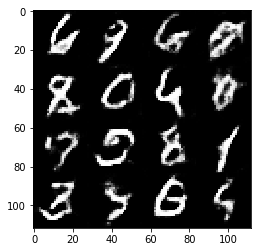

Epoch 1/2... Discriminator Loss: 1.6065... Generator Loss: 0.3963
Epoch 1/2... Discriminator Loss: 1.8216... Generator Loss: 0.3278
Epoch 1/2... Discriminator Loss: 1.6057... Generator Loss: 0.6366
Epoch 1/2... Discriminator Loss: 1.4727... Generator Loss: 0.4952
Epoch 1/2... Discriminator Loss: 1.7300... Generator Loss: 0.3539
Epoch 1/2... Discriminator Loss: 1.3033... Generator Loss: 0.9245
Epoch 1/2... Discriminator Loss: 1.1646... Generator Loss: 0.8180
Epoch 1/2... Discriminator Loss: 1.4305... Generator Loss: 0.6606
Epoch 1/2... Discriminator Loss: 1.3451... Generator Loss: 0.6764
Epoch 1/2... Discriminator Loss: 1.4408... Generator Loss: 0.5877


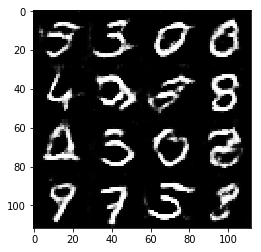

Epoch 1/2... Discriminator Loss: 2.0239... Generator Loss: 0.2391
Epoch 1/2... Discriminator Loss: 1.4200... Generator Loss: 0.4802
Epoch 1/2... Discriminator Loss: 1.8352... Generator Loss: 0.3030
Epoch 1/2... Discriminator Loss: 1.6052... Generator Loss: 0.3994
Epoch 1/2... Discriminator Loss: 1.3988... Generator Loss: 0.8214
Epoch 1/2... Discriminator Loss: 1.5249... Generator Loss: 0.4404
Epoch 1/2... Discriminator Loss: 1.6660... Generator Loss: 0.4035
Epoch 1/2... Discriminator Loss: 1.7182... Generator Loss: 0.3427
Epoch 1/2... Discriminator Loss: 1.9347... Generator Loss: 0.2448
Epoch 1/2... Discriminator Loss: 1.5123... Generator Loss: 0.4440


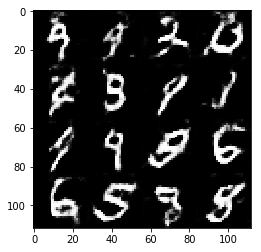

Epoch 1/2... Discriminator Loss: 1.4503... Generator Loss: 0.5814
Epoch 1/2... Discriminator Loss: 1.2932... Generator Loss: 0.8297
Epoch 1/2... Discriminator Loss: 1.2765... Generator Loss: 0.6953
Epoch 1/2... Discriminator Loss: 1.5421... Generator Loss: 0.4384
Epoch 1/2... Discriminator Loss: 1.6471... Generator Loss: 0.4638
Epoch 1/2... Discriminator Loss: 1.3974... Generator Loss: 0.5871
Epoch 1/2... Discriminator Loss: 1.4859... Generator Loss: 0.5517
Epoch 1/2... Discriminator Loss: 1.7537... Generator Loss: 0.3731
Epoch 1/2... Discriminator Loss: 1.1702... Generator Loss: 1.1706
Epoch 1/2... Discriminator Loss: 1.4879... Generator Loss: 0.5329


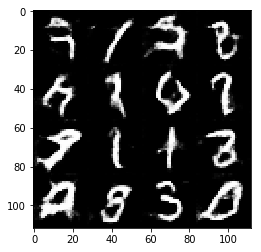

Epoch 1/2... Discriminator Loss: 1.5695... Generator Loss: 0.4214
Epoch 1/2... Discriminator Loss: 1.5893... Generator Loss: 0.3908
Epoch 1/2... Discriminator Loss: 1.4393... Generator Loss: 0.7091
Epoch 1/2... Discriminator Loss: 1.5528... Generator Loss: 0.4713
Epoch 1/2... Discriminator Loss: 1.2830... Generator Loss: 0.6464
Epoch 1/2... Discriminator Loss: 1.5992... Generator Loss: 0.3756
Epoch 1/2... Discriminator Loss: 1.5343... Generator Loss: 0.4216
Epoch 1/2... Discriminator Loss: 1.3248... Generator Loss: 0.5897
Epoch 1/2... Discriminator Loss: 1.3405... Generator Loss: 0.6762
Epoch 1/2... Discriminator Loss: 1.6062... Generator Loss: 0.3961


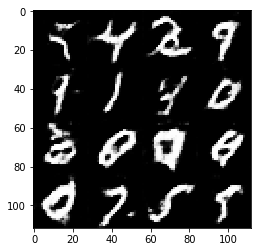

Epoch 1/2... Discriminator Loss: 1.4987... Generator Loss: 0.4812
Epoch 1/2... Discriminator Loss: 1.4028... Generator Loss: 0.6401
Epoch 1/2... Discriminator Loss: 1.3153... Generator Loss: 0.9028
Epoch 1/2... Discriminator Loss: 1.2110... Generator Loss: 0.6537
Epoch 1/2... Discriminator Loss: 1.4740... Generator Loss: 0.7758
Epoch 1/2... Discriminator Loss: 1.6175... Generator Loss: 0.4317
Epoch 1/2... Discriminator Loss: 1.4700... Generator Loss: 0.4627
Epoch 1/2... Discriminator Loss: 1.5354... Generator Loss: 0.4258
Epoch 1/2... Discriminator Loss: 1.4155... Generator Loss: 0.5509
Epoch 1/2... Discriminator Loss: 1.2987... Generator Loss: 0.5983


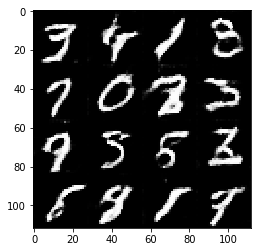

Epoch 1/2... Discriminator Loss: 1.2630... Generator Loss: 0.7124
Epoch 1/2... Discriminator Loss: 1.3902... Generator Loss: 0.5467
Epoch 1/2... Discriminator Loss: 1.3504... Generator Loss: 1.1582
Epoch 1/2... Discriminator Loss: 1.4282... Generator Loss: 0.6020
Epoch 1/2... Discriminator Loss: 1.4528... Generator Loss: 0.4834
Epoch 1/2... Discriminator Loss: 1.3729... Generator Loss: 0.6298
Epoch 1/2... Discriminator Loss: 1.3211... Generator Loss: 0.6072
Epoch 1/2... Discriminator Loss: 1.7800... Generator Loss: 0.3221
Epoch 1/2... Discriminator Loss: 1.0874... Generator Loss: 0.8636
Epoch 1/2... Discriminator Loss: 1.7403... Generator Loss: 0.3451


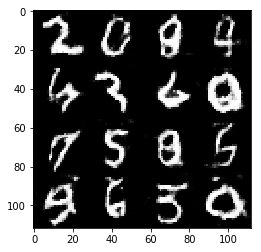

Epoch 1/2... Discriminator Loss: 1.8916... Generator Loss: 0.2895
Epoch 1/2... Discriminator Loss: 1.2128... Generator Loss: 0.7626
Epoch 1/2... Discriminator Loss: 1.5052... Generator Loss: 0.5207
Epoch 1/2... Discriminator Loss: 1.5151... Generator Loss: 0.4644
Epoch 1/2... Discriminator Loss: 1.1937... Generator Loss: 0.8334
Epoch 1/2... Discriminator Loss: 1.2762... Generator Loss: 0.7041
Epoch 1/2... Discriminator Loss: 1.6624... Generator Loss: 0.4847
Epoch 1/2... Discriminator Loss: 1.6878... Generator Loss: 0.3591
Epoch 1/2... Discriminator Loss: 1.2926... Generator Loss: 0.6981
Epoch 1/2... Discriminator Loss: 1.1393... Generator Loss: 0.8261


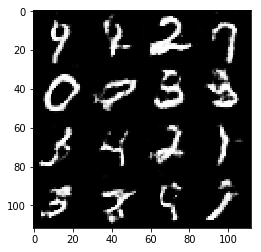

Epoch 1/2... Discriminator Loss: 1.6309... Generator Loss: 0.3765
Epoch 1/2... Discriminator Loss: 1.1925... Generator Loss: 1.4543
Epoch 1/2... Discriminator Loss: 1.2098... Generator Loss: 0.8096
Epoch 1/2... Discriminator Loss: 1.2775... Generator Loss: 1.0665
Epoch 1/2... Discriminator Loss: 1.5352... Generator Loss: 0.7145
Epoch 1/2... Discriminator Loss: 1.4600... Generator Loss: 0.4871
Epoch 1/2... Discriminator Loss: 1.4937... Generator Loss: 0.4592
Epoch 1/2... Discriminator Loss: 2.0036... Generator Loss: 0.2495
Epoch 1/2... Discriminator Loss: 1.4093... Generator Loss: 0.4873
Epoch 1/2... Discriminator Loss: 1.5670... Generator Loss: 0.4448


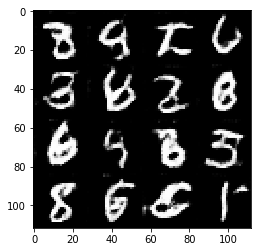

Epoch 1/2... Discriminator Loss: 1.2894... Generator Loss: 0.5738
Epoch 1/2... Discriminator Loss: 1.9078... Generator Loss: 0.2872
Epoch 1/2... Discriminator Loss: 1.2215... Generator Loss: 0.7550
Epoch 1/2... Discriminator Loss: 1.3750... Generator Loss: 0.5451
Epoch 1/2... Discriminator Loss: 1.1081... Generator Loss: 0.7989
Epoch 1/2... Discriminator Loss: 1.2626... Generator Loss: 0.6164
Epoch 1/2... Discriminator Loss: 1.8461... Generator Loss: 1.1822
Epoch 1/2... Discriminator Loss: 1.3505... Generator Loss: 0.8480
Epoch 1/2... Discriminator Loss: 1.5789... Generator Loss: 0.4569
Epoch 1/2... Discriminator Loss: 1.1725... Generator Loss: 0.7030


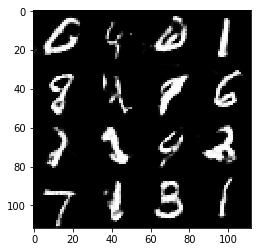

Epoch 1/2... Discriminator Loss: 1.2882... Generator Loss: 0.6558
Epoch 1/2... Discriminator Loss: 1.2881... Generator Loss: 0.9231
Epoch 1/2... Discriminator Loss: 1.3946... Generator Loss: 0.5323
Epoch 1/2... Discriminator Loss: 1.0003... Generator Loss: 1.0453
Epoch 1/2... Discriminator Loss: 1.2094... Generator Loss: 0.7757
Epoch 1/2... Discriminator Loss: 0.9656... Generator Loss: 0.9701
Epoch 1/2... Discriminator Loss: 1.3086... Generator Loss: 0.5681
Epoch 1/2... Discriminator Loss: 1.5781... Generator Loss: 0.4653
Epoch 1/2... Discriminator Loss: 0.8679... Generator Loss: 1.0670
Epoch 1/2... Discriminator Loss: 1.3011... Generator Loss: 0.6306


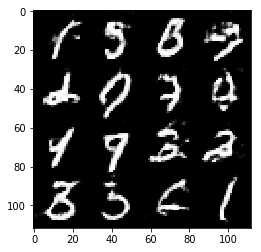

Epoch 1/2... Discriminator Loss: 1.1651... Generator Loss: 0.8747
Epoch 1/2... Discriminator Loss: 1.0157... Generator Loss: 1.2795
Epoch 1/2... Discriminator Loss: 1.0165... Generator Loss: 1.1442
Epoch 1/2... Discriminator Loss: 1.4095... Generator Loss: 0.5705
Epoch 1/2... Discriminator Loss: 1.7808... Generator Loss: 0.4830
Epoch 1/2... Discriminator Loss: 1.1985... Generator Loss: 0.7877
Epoch 1/2... Discriminator Loss: 1.2661... Generator Loss: 0.5990
Epoch 1/2... Discriminator Loss: 1.4638... Generator Loss: 0.5123
Epoch 1/2... Discriminator Loss: 1.1635... Generator Loss: 0.9271
Epoch 1/2... Discriminator Loss: 1.1589... Generator Loss: 0.7699


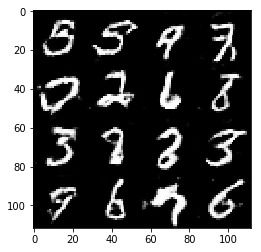

Epoch 1/2... Discriminator Loss: 1.0196... Generator Loss: 0.8426
Epoch 1/2... Discriminator Loss: 1.3402... Generator Loss: 0.5471
Epoch 1/2... Discriminator Loss: 1.0499... Generator Loss: 0.8648
Epoch 1/2... Discriminator Loss: 1.8531... Generator Loss: 0.2786
Epoch 1/2... Discriminator Loss: 1.2751... Generator Loss: 0.7140
Epoch 1/2... Discriminator Loss: 1.5577... Generator Loss: 0.4104
Epoch 1/2... Discriminator Loss: 1.3803... Generator Loss: 0.5583
Epoch 1/2... Discriminator Loss: 1.7927... Generator Loss: 0.3786
Epoch 2/2... Discriminator Loss: 1.1569... Generator Loss: 1.0350
Epoch 2/2... Discriminator Loss: 1.0505... Generator Loss: 1.1231


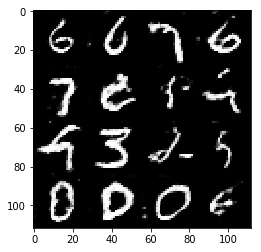

Epoch 2/2... Discriminator Loss: 1.1879... Generator Loss: 0.7806
Epoch 2/2... Discriminator Loss: 1.2763... Generator Loss: 0.6462
Epoch 2/2... Discriminator Loss: 1.3535... Generator Loss: 0.5421
Epoch 2/2... Discriminator Loss: 1.3496... Generator Loss: 0.6270
Epoch 2/2... Discriminator Loss: 1.1364... Generator Loss: 0.7520
Epoch 2/2... Discriminator Loss: 1.0755... Generator Loss: 0.8624
Epoch 2/2... Discriminator Loss: 1.7070... Generator Loss: 0.3689
Epoch 2/2... Discriminator Loss: 1.4477... Generator Loss: 0.4797
Epoch 2/2... Discriminator Loss: 1.2143... Generator Loss: 1.2781
Epoch 2/2... Discriminator Loss: 1.1210... Generator Loss: 0.7688


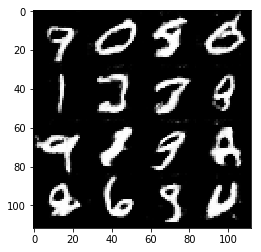

Epoch 2/2... Discriminator Loss: 1.3638... Generator Loss: 0.5797
Epoch 2/2... Discriminator Loss: 1.0383... Generator Loss: 0.8989
Epoch 2/2... Discriminator Loss: 1.0167... Generator Loss: 0.9663
Epoch 2/2... Discriminator Loss: 1.5157... Generator Loss: 0.4462
Epoch 2/2... Discriminator Loss: 1.0869... Generator Loss: 0.9429
Epoch 2/2... Discriminator Loss: 1.3178... Generator Loss: 0.6067
Epoch 2/2... Discriminator Loss: 0.9657... Generator Loss: 1.3900
Epoch 2/2... Discriminator Loss: 1.1474... Generator Loss: 0.8395
Epoch 2/2... Discriminator Loss: 1.2437... Generator Loss: 0.7206
Epoch 2/2... Discriminator Loss: 1.4640... Generator Loss: 0.4789


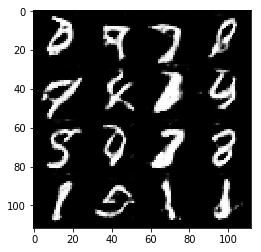

Epoch 2/2... Discriminator Loss: 1.0165... Generator Loss: 1.0364
Epoch 2/2... Discriminator Loss: 1.2174... Generator Loss: 0.7572
Epoch 2/2... Discriminator Loss: 1.0527... Generator Loss: 0.8549
Epoch 2/2... Discriminator Loss: 1.1039... Generator Loss: 0.7328
Epoch 2/2... Discriminator Loss: 1.1228... Generator Loss: 1.3766
Epoch 2/2... Discriminator Loss: 1.4729... Generator Loss: 0.5153
Epoch 2/2... Discriminator Loss: 1.5179... Generator Loss: 0.4506
Epoch 2/2... Discriminator Loss: 1.7512... Generator Loss: 0.3577
Epoch 2/2... Discriminator Loss: 1.1846... Generator Loss: 0.8165
Epoch 2/2... Discriminator Loss: 0.8373... Generator Loss: 1.1126


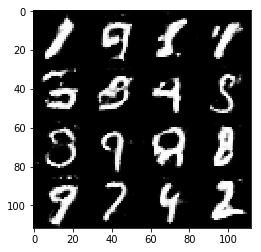

Epoch 2/2... Discriminator Loss: 1.1694... Generator Loss: 0.6569
Epoch 2/2... Discriminator Loss: 0.9814... Generator Loss: 0.9198
Epoch 2/2... Discriminator Loss: 1.2254... Generator Loss: 0.6765
Epoch 2/2... Discriminator Loss: 1.4020... Generator Loss: 1.2740
Epoch 2/2... Discriminator Loss: 1.1960... Generator Loss: 0.8390
Epoch 2/2... Discriminator Loss: 1.2064... Generator Loss: 0.7126
Epoch 2/2... Discriminator Loss: 1.0842... Generator Loss: 0.8387
Epoch 2/2... Discriminator Loss: 1.2360... Generator Loss: 0.8736
Epoch 2/2... Discriminator Loss: 1.2229... Generator Loss: 0.6150
Epoch 2/2... Discriminator Loss: 1.3916... Generator Loss: 0.5366


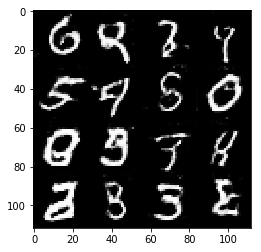

Epoch 2/2... Discriminator Loss: 1.0713... Generator Loss: 0.9194
Epoch 2/2... Discriminator Loss: 1.1072... Generator Loss: 0.8403
Epoch 2/2... Discriminator Loss: 2.2388... Generator Loss: 0.2245
Epoch 2/2... Discriminator Loss: 1.5682... Generator Loss: 0.4984
Epoch 2/2... Discriminator Loss: 1.3912... Generator Loss: 0.5804
Epoch 2/2... Discriminator Loss: 1.2357... Generator Loss: 0.6662
Epoch 2/2... Discriminator Loss: 1.2809... Generator Loss: 0.5799
Epoch 2/2... Discriminator Loss: 1.1707... Generator Loss: 0.7090
Epoch 2/2... Discriminator Loss: 1.5651... Generator Loss: 0.4736
Epoch 2/2... Discriminator Loss: 1.1710... Generator Loss: 0.7574


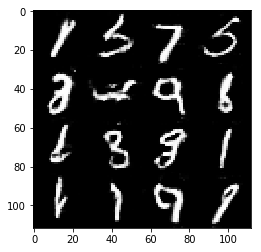

Epoch 2/2... Discriminator Loss: 1.7340... Generator Loss: 0.3257
Epoch 2/2... Discriminator Loss: 1.2458... Generator Loss: 0.7054
Epoch 2/2... Discriminator Loss: 1.0921... Generator Loss: 0.8558
Epoch 2/2... Discriminator Loss: 1.4060... Generator Loss: 0.4826
Epoch 2/2... Discriminator Loss: 1.4469... Generator Loss: 0.5128
Epoch 2/2... Discriminator Loss: 1.9357... Generator Loss: 0.2768
Epoch 2/2... Discriminator Loss: 1.2552... Generator Loss: 0.6069
Epoch 2/2... Discriminator Loss: 1.1246... Generator Loss: 0.8028
Epoch 2/2... Discriminator Loss: 1.2300... Generator Loss: 0.6629
Epoch 2/2... Discriminator Loss: 1.5192... Generator Loss: 0.4609


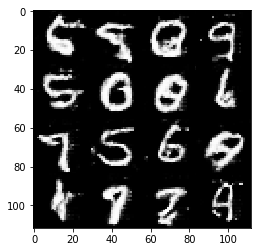

Epoch 2/2... Discriminator Loss: 1.5500... Generator Loss: 1.3038
Epoch 2/2... Discriminator Loss: 1.5653... Generator Loss: 0.4357
Epoch 2/2... Discriminator Loss: 1.0799... Generator Loss: 0.8781
Epoch 2/2... Discriminator Loss: 1.7037... Generator Loss: 0.3637
Epoch 2/2... Discriminator Loss: 1.2249... Generator Loss: 0.8837
Epoch 2/2... Discriminator Loss: 1.4903... Generator Loss: 0.4664
Epoch 2/2... Discriminator Loss: 1.3863... Generator Loss: 0.5284
Epoch 2/2... Discriminator Loss: 1.3550... Generator Loss: 0.5139
Epoch 2/2... Discriminator Loss: 1.0047... Generator Loss: 1.1393
Epoch 2/2... Discriminator Loss: 1.0117... Generator Loss: 1.1173


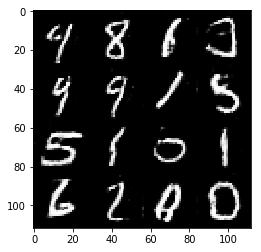

Epoch 2/2... Discriminator Loss: 1.0920... Generator Loss: 0.7910
Epoch 2/2... Discriminator Loss: 1.7730... Generator Loss: 0.3225
Epoch 2/2... Discriminator Loss: 1.0509... Generator Loss: 0.8541
Epoch 2/2... Discriminator Loss: 1.1504... Generator Loss: 0.7544
Epoch 2/2... Discriminator Loss: 1.4177... Generator Loss: 0.5291
Epoch 2/2... Discriminator Loss: 1.5818... Generator Loss: 0.4584
Epoch 2/2... Discriminator Loss: 1.1303... Generator Loss: 0.8150
Epoch 2/2... Discriminator Loss: 1.3957... Generator Loss: 0.5859
Epoch 2/2... Discriminator Loss: 0.9411... Generator Loss: 1.1698
Epoch 2/2... Discriminator Loss: 1.2017... Generator Loss: 0.6682


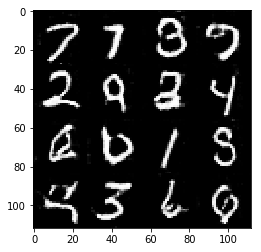

Epoch 2/2... Discriminator Loss: 1.0997... Generator Loss: 0.8100
Epoch 2/2... Discriminator Loss: 1.2038... Generator Loss: 0.7353
Epoch 2/2... Discriminator Loss: 1.5264... Generator Loss: 0.4318
Epoch 2/2... Discriminator Loss: 1.9623... Generator Loss: 0.2712
Epoch 2/2... Discriminator Loss: 1.0912... Generator Loss: 1.1710
Epoch 2/2... Discriminator Loss: 1.3278... Generator Loss: 0.5351
Epoch 2/2... Discriminator Loss: 1.1757... Generator Loss: 0.6658
Epoch 2/2... Discriminator Loss: 1.7351... Generator Loss: 1.1722
Epoch 2/2... Discriminator Loss: 1.0127... Generator Loss: 0.9678
Epoch 2/2... Discriminator Loss: 1.4188... Generator Loss: 0.4776


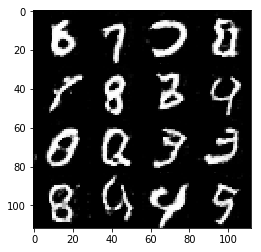

Epoch 2/2... Discriminator Loss: 1.4190... Generator Loss: 0.4893
Epoch 2/2... Discriminator Loss: 1.1302... Generator Loss: 0.8365
Epoch 2/2... Discriminator Loss: 1.2867... Generator Loss: 0.6412
Epoch 2/2... Discriminator Loss: 0.9397... Generator Loss: 0.9786
Epoch 2/2... Discriminator Loss: 1.2898... Generator Loss: 0.6444
Epoch 2/2... Discriminator Loss: 2.0218... Generator Loss: 0.2574
Epoch 2/2... Discriminator Loss: 1.5707... Generator Loss: 0.3767
Epoch 2/2... Discriminator Loss: 1.0954... Generator Loss: 0.8298
Epoch 2/2... Discriminator Loss: 1.3256... Generator Loss: 0.5477
Epoch 2/2... Discriminator Loss: 0.9694... Generator Loss: 0.9143


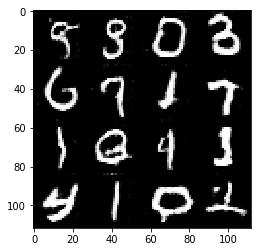

Epoch 2/2... Discriminator Loss: 1.3496... Generator Loss: 1.3550
Epoch 2/2... Discriminator Loss: 1.3765... Generator Loss: 0.5313
Epoch 2/2... Discriminator Loss: 1.4599... Generator Loss: 0.4586
Epoch 2/2... Discriminator Loss: 0.7312... Generator Loss: 1.4435
Epoch 2/2... Discriminator Loss: 1.2468... Generator Loss: 0.6266
Epoch 2/2... Discriminator Loss: 0.9581... Generator Loss: 1.0715
Epoch 2/2... Discriminator Loss: 1.0498... Generator Loss: 1.0950
Epoch 2/2... Discriminator Loss: 1.4804... Generator Loss: 0.5031
Epoch 2/2... Discriminator Loss: 2.1249... Generator Loss: 0.2485
Epoch 2/2... Discriminator Loss: 1.0658... Generator Loss: 0.8642


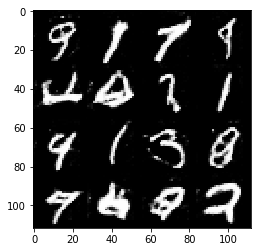

Epoch 2/2... Discriminator Loss: 1.1833... Generator Loss: 0.9065
Epoch 2/2... Discriminator Loss: 1.6710... Generator Loss: 0.3886
Epoch 2/2... Discriminator Loss: 1.2618... Generator Loss: 0.6561
Epoch 2/2... Discriminator Loss: 1.0315... Generator Loss: 0.8532
Epoch 2/2... Discriminator Loss: 1.2080... Generator Loss: 0.6884
Epoch 2/2... Discriminator Loss: 1.1267... Generator Loss: 0.7291
Epoch 2/2... Discriminator Loss: 1.0104... Generator Loss: 0.8937
Epoch 2/2... Discriminator Loss: 1.2662... Generator Loss: 0.6300
Epoch 2/2... Discriminator Loss: 1.0719... Generator Loss: 0.8332
Epoch 2/2... Discriminator Loss: 1.4237... Generator Loss: 0.5009


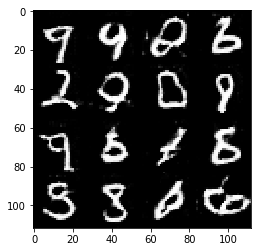

Epoch 2/2... Discriminator Loss: 1.1984... Generator Loss: 0.7267
Epoch 2/2... Discriminator Loss: 0.9617... Generator Loss: 0.9214
Epoch 2/2... Discriminator Loss: 1.4020... Generator Loss: 0.6741
Epoch 2/2... Discriminator Loss: 1.5142... Generator Loss: 0.4930
Epoch 2/2... Discriminator Loss: 1.2583... Generator Loss: 0.6641
Epoch 2/2... Discriminator Loss: 1.2475... Generator Loss: 0.6478
Epoch 2/2... Discriminator Loss: 1.2996... Generator Loss: 0.6202
Epoch 2/2... Discriminator Loss: 1.4248... Generator Loss: 0.5535
Epoch 2/2... Discriminator Loss: 1.5995... Generator Loss: 0.4643
Epoch 2/2... Discriminator Loss: 1.5199... Generator Loss: 0.7676


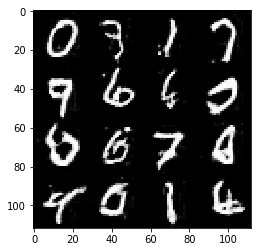

Epoch 2/2... Discriminator Loss: 0.9584... Generator Loss: 1.4833
Epoch 2/2... Discriminator Loss: 1.2265... Generator Loss: 0.6234
Epoch 2/2... Discriminator Loss: 1.5592... Generator Loss: 0.4146
Epoch 2/2... Discriminator Loss: 1.6870... Generator Loss: 0.4382
Epoch 2/2... Discriminator Loss: 0.9957... Generator Loss: 1.1275
Epoch 2/2... Discriminator Loss: 1.0913... Generator Loss: 0.8957
Epoch 2/2... Discriminator Loss: 1.4818... Generator Loss: 0.5158
Epoch 2/2... Discriminator Loss: 1.7873... Generator Loss: 0.3313
Epoch 2/2... Discriminator Loss: 1.1206... Generator Loss: 0.8401
Epoch 2/2... Discriminator Loss: 1.5880... Generator Loss: 0.3851


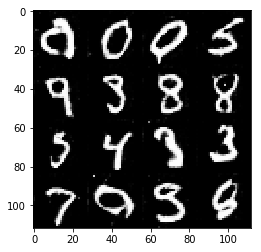

Epoch 2/2... Discriminator Loss: 1.5157... Generator Loss: 0.5131
Epoch 2/2... Discriminator Loss: 0.8287... Generator Loss: 1.1462
Epoch 2/2... Discriminator Loss: 1.0145... Generator Loss: 0.9562
Epoch 2/2... Discriminator Loss: 1.2991... Generator Loss: 0.6545
Epoch 2/2... Discriminator Loss: 1.3115... Generator Loss: 0.5748
Epoch 2/2... Discriminator Loss: 1.2588... Generator Loss: 0.7223
Epoch 2/2... Discriminator Loss: 1.0068... Generator Loss: 0.8477
Epoch 2/2... Discriminator Loss: 1.3985... Generator Loss: 0.4804
Epoch 2/2... Discriminator Loss: 1.3812... Generator Loss: 0.5032
Epoch 2/2... Discriminator Loss: 1.0061... Generator Loss: 1.3717


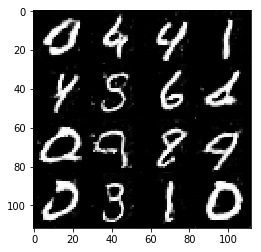

Epoch 2/2... Discriminator Loss: 1.4434... Generator Loss: 0.5200
Epoch 2/2... Discriminator Loss: 1.0661... Generator Loss: 0.8400
Epoch 2/2... Discriminator Loss: 1.3645... Generator Loss: 0.5535
Epoch 2/2... Discriminator Loss: 1.0410... Generator Loss: 0.9133
Epoch 2/2... Discriminator Loss: 1.1683... Generator Loss: 0.7199
Epoch 2/2... Discriminator Loss: 1.6994... Generator Loss: 0.3702
Epoch 2/2... Discriminator Loss: 1.0669... Generator Loss: 0.8741
Epoch 2/2... Discriminator Loss: 1.0808... Generator Loss: 1.0097
Epoch 2/2... Discriminator Loss: 1.0084... Generator Loss: 0.8246
Epoch 2/2... Discriminator Loss: 1.3031... Generator Loss: 1.2511


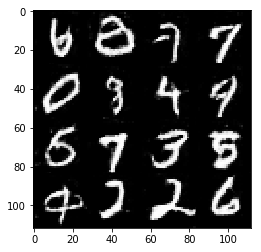

Epoch 2/2... Discriminator Loss: 1.3501... Generator Loss: 0.6014
Epoch 2/2... Discriminator Loss: 1.7935... Generator Loss: 0.3462
Epoch 2/2... Discriminator Loss: 0.9250... Generator Loss: 1.1513
Epoch 2/2... Discriminator Loss: 1.6333... Generator Loss: 0.3917
Epoch 2/2... Discriminator Loss: 1.0580... Generator Loss: 0.8326
Epoch 2/2... Discriminator Loss: 1.0315... Generator Loss: 1.0615
Epoch 2/2... Discriminator Loss: 1.0161... Generator Loss: 0.9339
Epoch 2/2... Discriminator Loss: 1.6671... Generator Loss: 0.4520
Epoch 2/2... Discriminator Loss: 0.9895... Generator Loss: 1.0099
Epoch 2/2... Discriminator Loss: 2.9223... Generator Loss: 0.1374


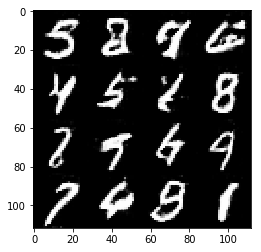

Epoch 2/2... Discriminator Loss: 0.9914... Generator Loss: 0.9217
Epoch 2/2... Discriminator Loss: 0.9513... Generator Loss: 1.2610
Epoch 2/2... Discriminator Loss: 1.3102... Generator Loss: 0.6619
Epoch 2/2... Discriminator Loss: 1.1066... Generator Loss: 0.9274
Epoch 2/2... Discriminator Loss: 1.2974... Generator Loss: 0.6348
Epoch 2/2... Discriminator Loss: 0.8579... Generator Loss: 1.0651
Epoch 2/2... Discriminator Loss: 1.7093... Generator Loss: 0.3300
Epoch 2/2... Discriminator Loss: 1.3525... Generator Loss: 0.5734
Epoch 2/2... Discriminator Loss: 1.1784... Generator Loss: 0.6706
Epoch 2/2... Discriminator Loss: 1.1336... Generator Loss: 0.7704


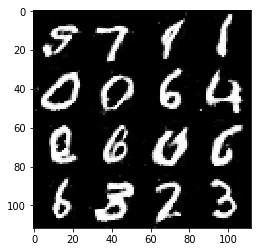

Epoch 2/2... Discriminator Loss: 1.4193... Generator Loss: 0.5271
Epoch 2/2... Discriminator Loss: 0.8168... Generator Loss: 1.2854
Epoch 2/2... Discriminator Loss: 1.5678... Generator Loss: 0.4960
Epoch 2/2... Discriminator Loss: 1.3091... Generator Loss: 0.5631
Epoch 2/2... Discriminator Loss: 1.2087... Generator Loss: 0.7005
Epoch 2/2... Discriminator Loss: 1.5089... Generator Loss: 0.4879


In [12]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.8156... Generator Loss: 0.1487
Epoch 1/1... Discriminator Loss: 2.0943... Generator Loss: 0.3597
Epoch 1/1... Discriminator Loss: 2.1262... Generator Loss: 0.4140
Epoch 1/1... Discriminator Loss: 2.5040... Generator Loss: 0.1740
Epoch 1/1... Discriminator Loss: 1.8633... Generator Loss: 0.8158
Epoch 1/1... Discriminator Loss: 2.1874... Generator Loss: 0.2993
Epoch 1/1... Discriminator Loss: 1.6525... Generator Loss: 0.6816
Epoch 1/1... Discriminator Loss: 2.1106... Generator Loss: 0.2515
Epoch 1/1... Discriminator Loss: 1.9982... Generator Loss: 0.2765


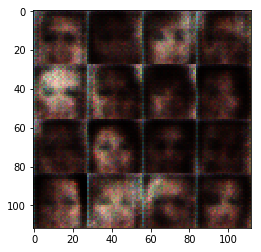

Epoch 1/1... Discriminator Loss: 2.0435... Generator Loss: 0.3154
Epoch 1/1... Discriminator Loss: 1.7428... Generator Loss: 0.4192
Epoch 1/1... Discriminator Loss: 2.6310... Generator Loss: 0.1347
Epoch 1/1... Discriminator Loss: 2.0952... Generator Loss: 0.2279
Epoch 1/1... Discriminator Loss: 1.5315... Generator Loss: 0.7855
Epoch 1/1... Discriminator Loss: 1.7684... Generator Loss: 0.3687
Epoch 1/1... Discriminator Loss: 1.7009... Generator Loss: 0.5957
Epoch 1/1... Discriminator Loss: 2.1110... Generator Loss: 0.2555
Epoch 1/1... Discriminator Loss: 1.4702... Generator Loss: 1.5914
Epoch 1/1... Discriminator Loss: 1.7478... Generator Loss: 0.3734


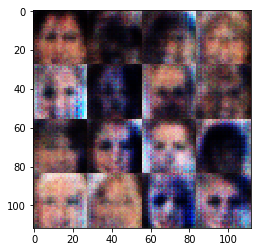

Epoch 1/1... Discriminator Loss: 2.0493... Generator Loss: 0.3563
Epoch 1/1... Discriminator Loss: 2.2076... Generator Loss: 0.2082
Epoch 1/1... Discriminator Loss: 1.7039... Generator Loss: 0.7428
Epoch 1/1... Discriminator Loss: 1.7707... Generator Loss: 0.4366
Epoch 1/1... Discriminator Loss: 1.5470... Generator Loss: 0.6720
Epoch 1/1... Discriminator Loss: 1.6276... Generator Loss: 0.4774
Epoch 1/1... Discriminator Loss: 1.6705... Generator Loss: 0.4561
Epoch 1/1... Discriminator Loss: 1.7028... Generator Loss: 0.4165
Epoch 1/1... Discriminator Loss: 1.9222... Generator Loss: 0.3363
Epoch 1/1... Discriminator Loss: 1.5860... Generator Loss: 0.6177


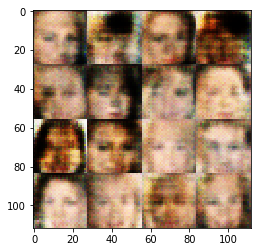

Epoch 1/1... Discriminator Loss: 1.6135... Generator Loss: 0.6766
Epoch 1/1... Discriminator Loss: 1.7985... Generator Loss: 0.3907
Epoch 1/1... Discriminator Loss: 1.8082... Generator Loss: 0.5011
Epoch 1/1... Discriminator Loss: 1.8210... Generator Loss: 0.5206
Epoch 1/1... Discriminator Loss: 1.7530... Generator Loss: 0.4869
Epoch 1/1... Discriminator Loss: 1.5894... Generator Loss: 0.4848
Epoch 1/1... Discriminator Loss: 1.6522... Generator Loss: 0.6265
Epoch 1/1... Discriminator Loss: 1.6978... Generator Loss: 0.4421
Epoch 1/1... Discriminator Loss: 1.7490... Generator Loss: 0.5568
Epoch 1/1... Discriminator Loss: 1.6228... Generator Loss: 0.5555


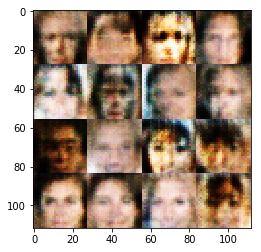

Epoch 1/1... Discriminator Loss: 1.6773... Generator Loss: 0.6594
Epoch 1/1... Discriminator Loss: 1.5848... Generator Loss: 0.6094
Epoch 1/1... Discriminator Loss: 1.5503... Generator Loss: 0.9433
Epoch 1/1... Discriminator Loss: 1.7475... Generator Loss: 0.3540
Epoch 1/1... Discriminator Loss: 1.6325... Generator Loss: 0.5596
Epoch 1/1... Discriminator Loss: 1.5624... Generator Loss: 0.7028
Epoch 1/1... Discriminator Loss: 1.6990... Generator Loss: 0.4309
Epoch 1/1... Discriminator Loss: 1.9024... Generator Loss: 0.3457
Epoch 1/1... Discriminator Loss: 1.5678... Generator Loss: 0.6060
Epoch 1/1... Discriminator Loss: 1.5833... Generator Loss: 0.6515


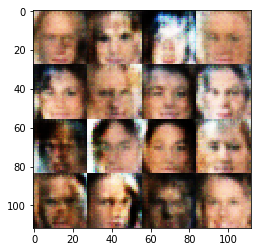

Epoch 1/1... Discriminator Loss: 1.4247... Generator Loss: 0.7045
Epoch 1/1... Discriminator Loss: 1.7350... Generator Loss: 0.4877
Epoch 1/1... Discriminator Loss: 1.5095... Generator Loss: 0.5508
Epoch 1/1... Discriminator Loss: 1.7251... Generator Loss: 0.4305
Epoch 1/1... Discriminator Loss: 1.7311... Generator Loss: 0.5003
Epoch 1/1... Discriminator Loss: 1.7738... Generator Loss: 0.4873
Epoch 1/1... Discriminator Loss: 1.6259... Generator Loss: 0.4706
Epoch 1/1... Discriminator Loss: 1.4619... Generator Loss: 0.5247
Epoch 1/1... Discriminator Loss: 1.5613... Generator Loss: 0.5508
Epoch 1/1... Discriminator Loss: 1.4320... Generator Loss: 0.7258


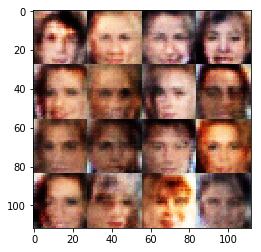

Epoch 1/1... Discriminator Loss: 1.3997... Generator Loss: 0.6985
Epoch 1/1... Discriminator Loss: 1.6492... Generator Loss: 0.5828
Epoch 1/1... Discriminator Loss: 1.6030... Generator Loss: 0.4775
Epoch 1/1... Discriminator Loss: 1.4638... Generator Loss: 0.6566
Epoch 1/1... Discriminator Loss: 1.4175... Generator Loss: 0.7479
Epoch 1/1... Discriminator Loss: 1.4468... Generator Loss: 0.8204
Epoch 1/1... Discriminator Loss: 1.5434... Generator Loss: 0.4478
Epoch 1/1... Discriminator Loss: 1.3175... Generator Loss: 0.7452
Epoch 1/1... Discriminator Loss: 1.8948... Generator Loss: 0.3298
Epoch 1/1... Discriminator Loss: 1.6543... Generator Loss: 0.4317


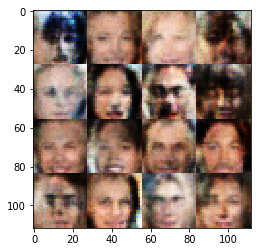

Epoch 1/1... Discriminator Loss: 1.4918... Generator Loss: 0.6582
Epoch 1/1... Discriminator Loss: 1.5097... Generator Loss: 0.5897
Epoch 1/1... Discriminator Loss: 1.3962... Generator Loss: 0.9956
Epoch 1/1... Discriminator Loss: 1.6136... Generator Loss: 0.4659
Epoch 1/1... Discriminator Loss: 1.3766... Generator Loss: 0.6946
Epoch 1/1... Discriminator Loss: 1.1760... Generator Loss: 1.0159
Epoch 1/1... Discriminator Loss: 1.5036... Generator Loss: 0.5668
Epoch 1/1... Discriminator Loss: 1.5381... Generator Loss: 0.5987
Epoch 1/1... Discriminator Loss: 1.6009... Generator Loss: 0.6196
Epoch 1/1... Discriminator Loss: 1.5404... Generator Loss: 0.6738


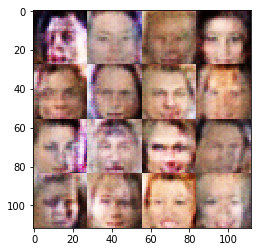

Epoch 1/1... Discriminator Loss: 1.6504... Generator Loss: 0.4714
Epoch 1/1... Discriminator Loss: 1.6346... Generator Loss: 0.4970
Epoch 1/1... Discriminator Loss: 1.7720... Generator Loss: 0.4765
Epoch 1/1... Discriminator Loss: 1.6410... Generator Loss: 0.5303
Epoch 1/1... Discriminator Loss: 1.5620... Generator Loss: 0.5702
Epoch 1/1... Discriminator Loss: 1.4781... Generator Loss: 0.6617
Epoch 1/1... Discriminator Loss: 1.5929... Generator Loss: 0.7401
Epoch 1/1... Discriminator Loss: 1.4977... Generator Loss: 0.7287
Epoch 1/1... Discriminator Loss: 1.6354... Generator Loss: 0.4454
Epoch 1/1... Discriminator Loss: 1.4911... Generator Loss: 0.5285


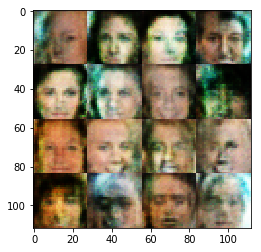

Epoch 1/1... Discriminator Loss: 1.4927... Generator Loss: 0.5295
Epoch 1/1... Discriminator Loss: 1.5868... Generator Loss: 0.4522
Epoch 1/1... Discriminator Loss: 1.7294... Generator Loss: 0.4615
Epoch 1/1... Discriminator Loss: 1.7418... Generator Loss: 0.5022
Epoch 1/1... Discriminator Loss: 1.6470... Generator Loss: 0.4733
Epoch 1/1... Discriminator Loss: 1.4161... Generator Loss: 0.8190
Epoch 1/1... Discriminator Loss: 1.6946... Generator Loss: 0.4701
Epoch 1/1... Discriminator Loss: 1.6667... Generator Loss: 0.3896
Epoch 1/1... Discriminator Loss: 1.5375... Generator Loss: 0.5746
Epoch 1/1... Discriminator Loss: 1.8113... Generator Loss: 0.3754


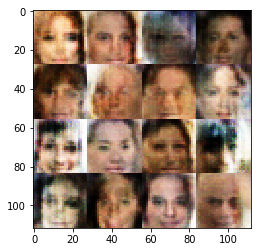

Epoch 1/1... Discriminator Loss: 1.6116... Generator Loss: 0.6106
Epoch 1/1... Discriminator Loss: 1.5240... Generator Loss: 0.5048
Epoch 1/1... Discriminator Loss: 1.5674... Generator Loss: 0.7219
Epoch 1/1... Discriminator Loss: 1.5176... Generator Loss: 0.5228
Epoch 1/1... Discriminator Loss: 1.2851... Generator Loss: 0.9004
Epoch 1/1... Discriminator Loss: 1.6188... Generator Loss: 0.4833
Epoch 1/1... Discriminator Loss: 1.5709... Generator Loss: 0.5596
Epoch 1/1... Discriminator Loss: 1.5586... Generator Loss: 0.5361
Epoch 1/1... Discriminator Loss: 1.8023... Generator Loss: 0.3836
Epoch 1/1... Discriminator Loss: 1.6710... Generator Loss: 0.4168


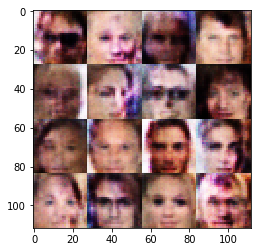

Epoch 1/1... Discriminator Loss: 1.6544... Generator Loss: 0.4705
Epoch 1/1... Discriminator Loss: 1.6680... Generator Loss: 0.4528
Epoch 1/1... Discriminator Loss: 1.4898... Generator Loss: 0.6427
Epoch 1/1... Discriminator Loss: 1.5692... Generator Loss: 0.5677
Epoch 1/1... Discriminator Loss: 1.6294... Generator Loss: 0.4773
Epoch 1/1... Discriminator Loss: 1.7861... Generator Loss: 0.3743
Epoch 1/1... Discriminator Loss: 1.4978... Generator Loss: 0.6409
Epoch 1/1... Discriminator Loss: 1.7622... Generator Loss: 0.3864
Epoch 1/1... Discriminator Loss: 1.4411... Generator Loss: 0.6229
Epoch 1/1... Discriminator Loss: 1.6413... Generator Loss: 0.4948


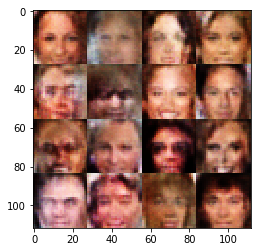

Epoch 1/1... Discriminator Loss: 1.8236... Generator Loss: 0.3953
Epoch 1/1... Discriminator Loss: 1.7455... Generator Loss: 0.4299
Epoch 1/1... Discriminator Loss: 1.7162... Generator Loss: 0.4607
Epoch 1/1... Discriminator Loss: 1.4623... Generator Loss: 0.6341
Epoch 1/1... Discriminator Loss: 1.4695... Generator Loss: 0.7548
Epoch 1/1... Discriminator Loss: 1.6890... Generator Loss: 0.4627
Epoch 1/1... Discriminator Loss: 1.4837... Generator Loss: 0.6226
Epoch 1/1... Discriminator Loss: 1.4187... Generator Loss: 0.7495
Epoch 1/1... Discriminator Loss: 1.6452... Generator Loss: 0.4950
Epoch 1/1... Discriminator Loss: 1.6259... Generator Loss: 0.4819


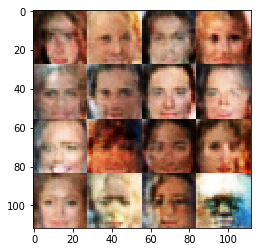

Epoch 1/1... Discriminator Loss: 1.4735... Generator Loss: 0.5688
Epoch 1/1... Discriminator Loss: 1.5009... Generator Loss: 0.6429
Epoch 1/1... Discriminator Loss: 1.3421... Generator Loss: 0.8060
Epoch 1/1... Discriminator Loss: 1.5291... Generator Loss: 0.5609
Epoch 1/1... Discriminator Loss: 1.6143... Generator Loss: 0.5347
Epoch 1/1... Discriminator Loss: 1.4290... Generator Loss: 0.6072
Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.6332
Epoch 1/1... Discriminator Loss: 1.4916... Generator Loss: 0.5370
Epoch 1/1... Discriminator Loss: 1.5559... Generator Loss: 0.5529
Epoch 1/1... Discriminator Loss: 1.7420... Generator Loss: 0.5609


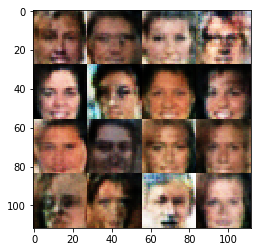

Epoch 1/1... Discriminator Loss: 1.7148... Generator Loss: 0.3980
Epoch 1/1... Discriminator Loss: 1.4536... Generator Loss: 0.5625
Epoch 1/1... Discriminator Loss: 1.6133... Generator Loss: 0.4878
Epoch 1/1... Discriminator Loss: 1.5119... Generator Loss: 0.5461
Epoch 1/1... Discriminator Loss: 1.6131... Generator Loss: 0.4968
Epoch 1/1... Discriminator Loss: 1.7735... Generator Loss: 0.4460
Epoch 1/1... Discriminator Loss: 1.6661... Generator Loss: 0.4769
Epoch 1/1... Discriminator Loss: 1.8173... Generator Loss: 0.3825
Epoch 1/1... Discriminator Loss: 1.5599... Generator Loss: 0.5303
Epoch 1/1... Discriminator Loss: 1.6443... Generator Loss: 0.4543


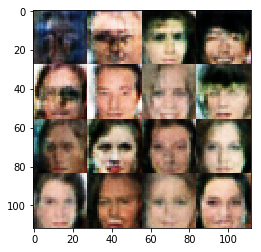

Epoch 1/1... Discriminator Loss: 1.5764... Generator Loss: 0.4996
Epoch 1/1... Discriminator Loss: 1.6828... Generator Loss: 0.4221
Epoch 1/1... Discriminator Loss: 1.5804... Generator Loss: 0.4360
Epoch 1/1... Discriminator Loss: 1.9150... Generator Loss: 0.3037
Epoch 1/1... Discriminator Loss: 1.4848... Generator Loss: 0.6082
Epoch 1/1... Discriminator Loss: 1.6613... Generator Loss: 0.5088
Epoch 1/1... Discriminator Loss: 1.5452... Generator Loss: 0.7069
Epoch 1/1... Discriminator Loss: 1.5171... Generator Loss: 0.5533
Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 0.6580
Epoch 1/1... Discriminator Loss: 1.7437... Generator Loss: 0.3766


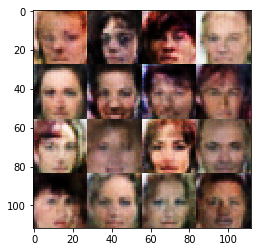

Epoch 1/1... Discriminator Loss: 1.6749... Generator Loss: 0.4003
Epoch 1/1... Discriminator Loss: 1.6243... Generator Loss: 0.4368
Epoch 1/1... Discriminator Loss: 1.6940... Generator Loss: 0.4584
Epoch 1/1... Discriminator Loss: 1.5704... Generator Loss: 0.4648
Epoch 1/1... Discriminator Loss: 1.8671... Generator Loss: 0.3405
Epoch 1/1... Discriminator Loss: 1.6946... Generator Loss: 0.5133
Epoch 1/1... Discriminator Loss: 1.6317... Generator Loss: 0.5392
Epoch 1/1... Discriminator Loss: 1.7166... Generator Loss: 0.5004
Epoch 1/1... Discriminator Loss: 1.6583... Generator Loss: 0.4254
Epoch 1/1... Discriminator Loss: 1.4976... Generator Loss: 0.5464


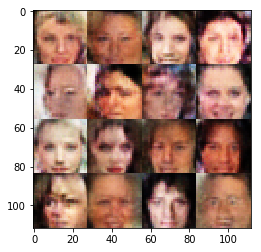

Epoch 1/1... Discriminator Loss: 1.6379... Generator Loss: 0.4922
Epoch 1/1... Discriminator Loss: 1.4694... Generator Loss: 0.6041
Epoch 1/1... Discriminator Loss: 1.5940... Generator Loss: 0.4597
Epoch 1/1... Discriminator Loss: 1.3309... Generator Loss: 0.7019
Epoch 1/1... Discriminator Loss: 1.9221... Generator Loss: 0.4039
Epoch 1/1... Discriminator Loss: 1.2362... Generator Loss: 0.7949
Epoch 1/1... Discriminator Loss: 1.6008... Generator Loss: 0.4792
Epoch 1/1... Discriminator Loss: 1.8219... Generator Loss: 0.3729
Epoch 1/1... Discriminator Loss: 1.9293... Generator Loss: 0.3133
Epoch 1/1... Discriminator Loss: 1.6981... Generator Loss: 0.4001


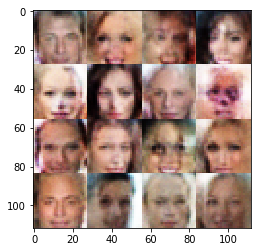

Epoch 1/1... Discriminator Loss: 1.6694... Generator Loss: 0.4663
Epoch 1/1... Discriminator Loss: 1.3115... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.6845... Generator Loss: 0.4922
Epoch 1/1... Discriminator Loss: 1.3992... Generator Loss: 0.6153
Epoch 1/1... Discriminator Loss: 1.5404... Generator Loss: 0.4545
Epoch 1/1... Discriminator Loss: 1.4248... Generator Loss: 0.6894
Epoch 1/1... Discriminator Loss: 1.5285... Generator Loss: 0.6672
Epoch 1/1... Discriminator Loss: 1.6508... Generator Loss: 0.4255
Epoch 1/1... Discriminator Loss: 1.6106... Generator Loss: 0.4827
Epoch 1/1... Discriminator Loss: 1.6502... Generator Loss: 0.4002


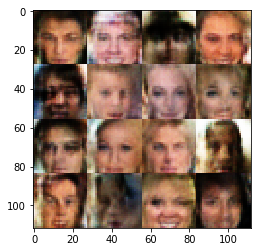

Epoch 1/1... Discriminator Loss: 1.4883... Generator Loss: 0.5716
Epoch 1/1... Discriminator Loss: 1.6100... Generator Loss: 0.5330
Epoch 1/1... Discriminator Loss: 1.7077... Generator Loss: 0.3639


KeyboardInterrupt: 

In [13]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.